# Q1

Let $f: R^2 \rightarrow R, (x_1, x_2) \rightarrow -cos(x_1^2+x_2^2+x_1x_2)$

In [1]:
import numpy as np

def f(x1, x2):
    return np.cos(x1**2 + x2**2 + x1*x2)

## 1. 
Create a contour plot of $f$ in the range $[-2, 2] \times [-2, 2]$ with Python.

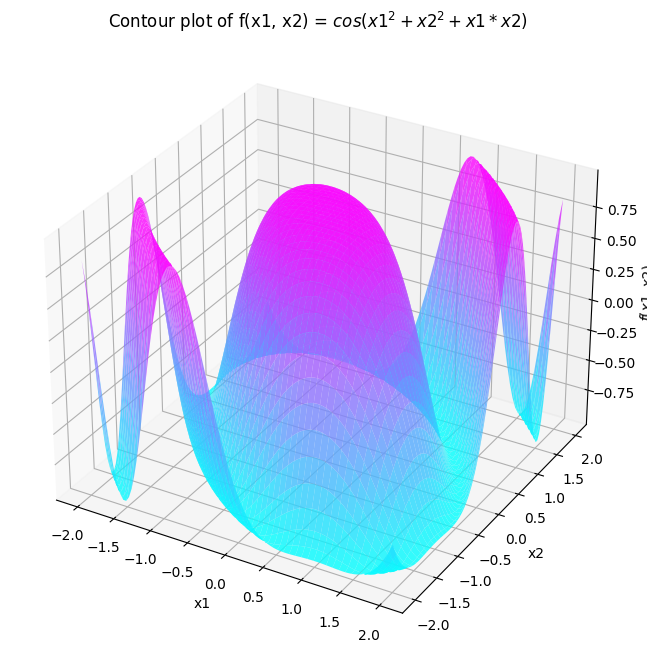

In [2]:
import matplotlib.pyplot as plt

x1_vals = np.linspace(-2, 2, 100)
x2_vals = np.linspace(-2, 2, 100)

x1, x2 = np.meshgrid(x1_vals, x2_vals)
z = f(x1, x2)

fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')

ax.plot_surface(x1, x2, z, cmap='cool', alpha=0.8)
ax.set_title('Contour plot of f(x1, x2) = $cos(x1^2 + x2^2 +x1*x2)$')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('$f(x1, x2)$')
plt.show()

## 2. 
Compute $\triangledown f$ and $\triangledown ^ 2 f$

$\triangledown f = \begin{bmatrix}-sin(x_1^2 + x_2^2 + x_1x_2)(2x_1 + x_2) & -sin(x_1^2 + x_2^2 +x_1x_2)(x_1 + 2x_2) \end{bmatrix}$
$\triangledown ^2 f = \begin{bmatrix}
    -cos(x_1^2 + x_2^2 + x_1x_2)(2x_1 + x_2)^2-2sin(x_1^2 + x_2^2 + x_1x_2) 
\end{bmatrix}$

# Q2.

Implement the gradients for the following functions in 2 methods 1) Using derivate function 2) Numerical gradient

Logistic Loss: $L(w) = \Sigma_{i=1}^{n} \log(1 + exp(-y_iw^Tx_i))$

Least Square Loss: $L(w) = \Sigma_{i=1}^{n}(y_i - w^Tx_i)^2.$
Here $y_i \in \R$

In [3]:
def generate_random_data(n, d):
    X = np.random.rand(n, d)
    y = np.random.rand(n)
    return X, y

n_samples = 100
n_features = 5
X, y = generate_random_data(n_samples, n_features)

In [4]:
w = np.random.rand(5)

In [5]:
def LogisticLoss(w):
    return np.sum(np.log(1 + np.exp((-y * np.dot(X, w)))))

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_loss_gradient(w):
    z = np.dot(X, w)
    sig_z = sigmoid(y * z)
    return -np.dot(y * X.T, 1 - sig_z)

def LeastSquareLoss(w):
    return np.sum((y - np.dot(X, w))**2)

def least_square_loss_gradeint(w):
    return np.dot(2*(y - np.dot(X, w)), -X)

In [6]:
LogisticLoss(w), LeastSquareLoss(w)

(46.30990629113417, 122.0254660337549)

In [7]:
logistic_loss_gradient(w)

array([-5.52093191, -6.52225685, -5.4256281 , -7.38120997, -6.30821853])

In [8]:
least_square_loss_gradeint(w)

array([108.16935825, 108.50893643,  85.19994022, 119.60785688,
       119.22232341])

In [9]:
def numericalGrad(funObj, w, epsilon):
    m = len(w)
    grad = np.zeros(m)
    for i in range(m):
        wp = np.copy(w)
        wn = np.copy(w)
        wp[i] = w[i] + epsilon
        wn[i] = w[i] - epsilon
        grad[i] = (funObj(wp) - funObj(wn))/(2*epsilon)
    return grad

In [10]:
numericalGrad(LogisticLoss, w, 0.001)

array([-5.52093196, -6.5222569 , -5.42562813, -7.38121005, -6.3082186 ])

In [11]:
numericalGrad(LeastSquareLoss, w, 0.001)

array([108.16935825, 108.50893643,  85.19994022, 119.60785688,
       119.22232341])

# Theory

## 4.

Let $f:[-1, 2] \rightarrow \R, x \rightarrow exp(x^3 - 2x^2)$

### (a) 

$f\prime = (3x^2 - 4x)exp(x^3 - 2x^2)$

### (b)

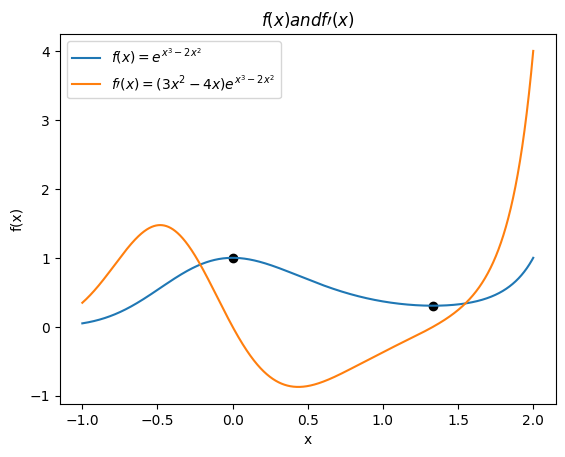

In [12]:
def f(x):
    return np.exp(x**3 - 2*x**2)

def f_prime(x):
    return (3*x**2 - 4*x) * np.exp(x**3 - 2*x**2)

x_vals = np.linspace(-1, 2, 10_000)
y_vals = f(x_vals)
z_vals = f_prime(x_vals)

plt.plot(x_vals, y_vals, label="$f(x) = e^{x^3 - 2x^2}$")
plt.plot(x_vals, z_vals, label="$f\prime(x) = (3x^2 - 4x)e^{x^3 - 2x^2}$")
# global maxima
plt.scatter(0, f(0), color='k')
# global minima
plt.scatter(4/3, f(4/3), color='k')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('$f(x) and f\prime(x)$')
plt.show()